# TITANIC Machine Learning For Disaster

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from collections import namedtuple
from sklearn.preprocessing import Binarizer
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['grid.linewidth'] = 0.5
sns.set_style('whitegrid')

In [2]:
train_df = pd.read_csv('C:\\Users\\susmitha kolli\\Desktop\\train.csv')

In [4]:
test_df = pd.read_csv('C:\\Users\\susmitha kolli\\Desktop\\test.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data Visualization is inspired by 

In [7]:

fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55
 
ax1 = plt.subplot2grid((2,3),(0,0))
              
train_df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)

ax1.set_xlim(-1, 2)

plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(train_df.Survived, train_df.Age, alpha=alpha_scatterplot)

plt.ylabel("Age")
                         
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
train_df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(train_df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)

train_df.Age[train_df.Pclass == 1].plot(kind='kde')    
train_df.Age[train_df.Pclass == 2].plot(kind='kde')
train_df.Age[train_df.Pclass == 3].plot(kind='kde')

plt.xlabel("Age")    
plt.title("Age Distribution within classes")

plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
train_df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(train_df.Embarked.value_counts()))

plt.title("Passengers per boarding location")
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


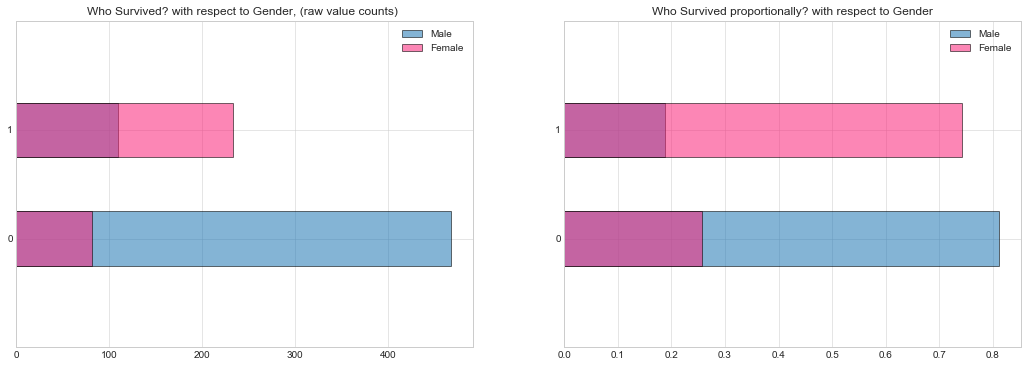

In [8]:
fig = plt.figure(figsize=(18,6))

train_df_male = train_df.Survived[train_df.Sex == 'male'].value_counts().sort_index()
train_df_female = train_df.Survived[train_df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
train_df_male.plot(kind='barh',label='Male', alpha=0.55)
train_df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

ax2 = fig.add_subplot(122)
(train_df_male/float(train_df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(train_df_female/float(train_df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)
plt.show()

In [9]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)
female_highclass = train_df.Survived[train_df.Sex == 'female'][train_df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = train_df.Survived[train_df.Sex == 'female'][train_df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = train_df.Survived[train_df.Sex == 'male'][train_df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = train_df.Survived[train_df.Sex == 'male'][train_df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')
plt.show()

# feature Engineering (original Work) 
Here I am Padding or replacing the nan values in Age, SibSp and Parch with sutable values using padding function 

In [10]:
def nan_padding(data, columns):
    for column in columns:
        imputer=Imputer()
        data[column]=imputer.fit_transform(data[column].values.reshape(-1,1))
    return data


nan_columns = ["Age", "SibSp", "Parch"]

train_data = nan_padding(train_df, nan_columns)
test_data = nan_padding(test_df, nan_columns)

Creating a Label using passengerID for evaluation

In [11]:
test_passenger_id=test_df["PassengerId"]

drop The Items which is not considered in the processing 

In [12]:
def drop_not_concerned(data, columns):
    return data.drop(columns, axis=1)

not_concerned_columns = ["PassengerId","Name", "Ticket", "Fare", "Cabin", "Embarked"]
train_data = drop_not_concerned(train_data, not_concerned_columns)
test_data = drop_not_concerned(test_data, not_concerned_columns)

In [13]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1.0,0.0
1,1,1,female,38.0,1.0,0.0
2,1,3,female,26.0,0.0,0.0
3,1,1,female,35.0,1.0,0.0
4,0,3,male,35.0,0.0,0.0


In [14]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0.0,0.0
1,3,female,47.0,1.0,0.0
2,2,male,62.0,0.0,0.0
3,3,male,27.0,0.0,0.0
4,3,female,22.0,1.0,1.0


In [15]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["Pclass"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)

add some dummhy classes 

In [16]:
test_data.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,male,34.5,0.0,0.0,0,0,1
1,female,47.0,1.0,0.0,0,0,1
2,male,62.0,0.0,0.0,0,1,0
3,male,27.0,0.0,0.0,0,0,1
4,female,22.0,1.0,1.0,0,0,1


convert sex to 0 for male and 1 for female 

In [17]:
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["Sex"]=le.transform(data["Sex"]) 
    return data

train_data = sex_to_int(train_data)
test_data = sex_to_int(test_data)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1.0,0.0,0,0,1
1,1,0,38.0,1.0,0.0,1,0,0
2,1,0,26.0,0.0,0.0,0,0,1
3,1,0,35.0,1.0,0.0,1,0,0
4,0,1,35.0,0.0,0.0,0,0,1


normalize Age so we can have all interrelated features 

In [18]:
def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data
train_data = normalize_age(train_data)
test_data = normalize_age(test_data)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,0.271174,1.0,0.0,0,0,1
1,1,0,0.472229,1.0,0.0,1,0,0
2,1,0,0.321438,0.0,0.0,0,0,1
3,1,0,0.434531,1.0,0.0,1,0,0
4,0,1,0.434531,0.0,0.0,0,0,1


dataset distribution between spliting test and train 

In [19]:
def split_valid_test_data(data, fraction=(1 - 0.8)):
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)

    data_x = data.drop(["Survived"], axis=1)

    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=fraction)

    return train_x.values, train_y, valid_x, valid_y

train_x, train_y, valid_x, valid_y = split_valid_test_data(train_data)
print("train_x:{}".format(train_x.shape))
print("train_y:{}".format(train_y.shape))
print("train_y content:{}".format(train_y[:3]))

print("valid_x:{}".format(valid_x.shape))
print("valid_y:{}".format(valid_y.shape))

train_x:(712, 7)
train_y:(712, 1)
train_y content:[[0]
 [0]
 [0]]
valid_x:(179, 7)
valid_y:(179, 1)


#  Building My own neural network using hardcode and few TensorFlow functions 

### For 10 hidden units and 20 epochs

In [20]:
def build_neural_network(hidden_units=10):
    tf.reset_default_graph()
    inputs = tf.placeholder(tf.float32, shape=[None, train_x.shape[1]])
    labels = tf.placeholder(tf.float32, shape=[None, 1])
    learning_rate = tf.placeholder(tf.float32)
    is_training=tf.Variable(True,dtype=tf.bool)
    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(inputs, hidden_units, activation=None,kernel_initializer=initializer)
    fc=tf.layers.batch_normalization(fc, training=is_training)
    fc=tf.nn.relu(fc)
    
    logits = tf.layers.dense(fc, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Export the nodes 
    export_nodes = ['inputs', 'labels', 'learning_rate','is_training', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

model = build_neural_network()

In [21]:
def get_batch(data_x,data_y,batch_size=32):
    batch_n=len(data_x)//batch_size
    for i in range(batch_n):
        batch_x=data_x[i*batch_size:(i+1)*batch_size]
        batch_y=data_y[i*batch_size:(i+1)*batch_size]
        
        yield batch_x,batch_y

In [22]:
epochs = 20

In [23]:
train_collect = 100

In [24]:
train_print=train_collect*2

In [25]:
learning_rate_value = 0.001
batch_size=16

In [26]:
x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

In [27]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    iteration=0
    for e in range(epochs):
        for batch_x,batch_y in get_batch(train_x,train_y,batch_size):
            iteration+=1
            feed = {model.inputs: train_x,
                    model.labels: train_y,
                    model.learning_rate: learning_rate_value,
                    model.is_training:True
                   }

            train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
            
            if iteration % train_collect == 0:
                x_collect.append(e)
                train_loss_collect.append(train_loss)
                train_acc_collect.append(train_acc)

                if iteration % train_print==0:
                     print("Epoch: {}/{}".format(e + 1, epochs),
                      "Train Loss: {:.4f}".format(train_loss),
                      "Train Acc: {:.4f}".format(train_acc))
                        
                feed = {model.inputs: valid_x,
                        model.labels: valid_y,
                        model.is_training:False
                       }
                val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
                valid_loss_collect.append(val_loss)
                valid_acc_collect.append(val_acc)
                
                if iteration % train_print==0:
                    print("Epoch: {}/{}".format(e + 1, epochs),
                      "Validation Loss: {:.4f}".format(val_loss),
                      "Validation Acc: {:.4f}".format(val_acc))
                

    saver.save(sess, "./titanic.ckpt")

Epoch: 5/20 Train Loss: 0.4386 Train Acc: 0.8104
Epoch: 5/20 Validation Loss: 0.4992 Validation Acc: 0.7933
Epoch: 10/20 Train Loss: 0.4096 Train Acc: 0.8160
Epoch: 10/20 Validation Loss: 0.4781 Validation Acc: 0.7877
Epoch: 14/20 Train Loss: 0.4004 Train Acc: 0.8216
Epoch: 14/20 Validation Loss: 0.4743 Validation Acc: 0.7821
Epoch: 19/20 Train Loss: 0.3961 Train Acc: 0.8287
Epoch: 19/20 Validation Loss: 0.4752 Validation Acc: 0.7877


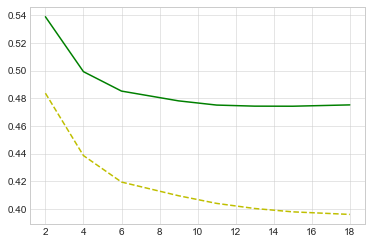

In [28]:
plt.plot(x_collect, train_loss_collect, "y--")
plt.plot(x_collect, valid_loss_collect, "g-")

plt.show()

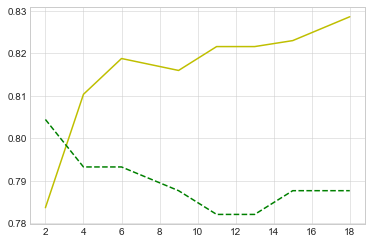

In [29]:
plt.plot(x_collect, train_acc_collect, "y")
plt.plot(x_collect, valid_acc_collect, "g--")
plt.show()

###  for 20 hidden units 50 epoch and learning rate=0.001

In [30]:
def build_neural_network(hidden_units=20):
    tf.reset_default_graph()
    inputs = tf.placeholder(tf.float32, shape=[None, train_x.shape[1]])
    labels = tf.placeholder(tf.float32, shape=[None, 1])
    learning_rate = tf.placeholder(tf.float32)
    is_training=tf.Variable(True,dtype=tf.bool)
    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(inputs, hidden_units, activation=None,kernel_initializer=initializer)
    fc=tf.layers.batch_normalization(fc, training=is_training)
    fc=tf.nn.relu(fc)
    

    logits = tf.layers.dense(fc, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Export the nodes 
    export_nodes = ['inputs', 'labels', 'learning_rate','is_training', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

model = build_neural_network()

In [31]:
def get_batch(data_x,data_y,batch_size=32):
    batch_n=len(data_x)//batch_size
    for i in range(batch_n):
        batch_x=data_x[i*batch_size:(i+1)*batch_size]
        batch_y=data_y[i*batch_size:(i+1)*batch_size]
        
        yield batch_x,batch_y

In [32]:
epochs = 20
train_collect = 100
train_print=train_collect*2
learning_rate_value = 0.001
batch_size=16

In [33]:
x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

In [34]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    iteration=0
    for e in range(epochs):
        for batch_x,batch_y in get_batch(train_x,train_y,batch_size):
            iteration+=1
            feed = {model.inputs: train_x,
                    model.labels: train_y,
                    model.learning_rate: learning_rate_value,
                    model.is_training:True
                   }

            train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
            
            if iteration % train_collect == 0:
                x_collect.append(e)
                train_loss_collect.append(train_loss)
                train_acc_collect.append(train_acc)

                if iteration % train_print==0:
                     print("Epoch: {}/{}".format(e + 1, epochs),
                      "Train Loss: {:.4f}".format(train_loss),
                      "Train Acc: {:.4f}".format(train_acc))
                        
                feed = {model.inputs: valid_x,
                        model.labels: valid_y,
                        model.is_training:False
                       }
                val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
                valid_loss_collect.append(val_loss)
                valid_acc_collect.append(val_acc)
                
                if iteration % train_print==0:
                    print("Epoch: {}/{}".format(e + 1, epochs),
                      "Validation Loss: {:.4f}".format(val_loss),
                      "Validation Acc: {:.4f}".format(val_acc))
                

    saver.save(sess, "./titanic.ckpt")

Epoch: 5/20 Train Loss: 0.4140 Train Acc: 0.8188
Epoch: 5/20 Validation Loss: 0.4801 Validation Acc: 0.7989
Epoch: 10/20 Train Loss: 0.3972 Train Acc: 0.8202
Epoch: 10/20 Validation Loss: 0.4563 Validation Acc: 0.8045
Epoch: 14/20 Train Loss: 0.3894 Train Acc: 0.8272
Epoch: 14/20 Validation Loss: 0.4620 Validation Acc: 0.8212
Epoch: 19/20 Train Loss: 0.3839 Train Acc: 0.8315
Epoch: 19/20 Validation Loss: 0.4727 Validation Acc: 0.7989


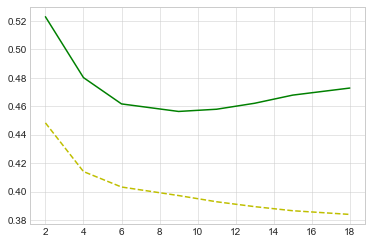

In [35]:
plt.plot(x_collect, train_loss_collect, "y--")
plt.plot(x_collect, valid_loss_collect, "g-")

plt.show()

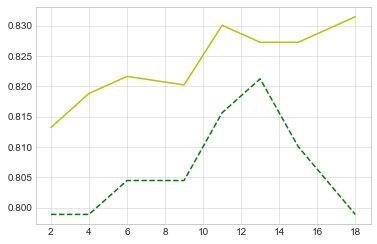

In [36]:
plt.plot(x_collect, train_acc_collect, "y")
plt.plot(x_collect, valid_acc_collect, "g--")
plt.show()

### for 50 hidden units 350 epoch and learning rate of 0.0001

In [37]:
def build_neural_network(hidden_units=50):
    tf.reset_default_graph()
    inputs = tf.placeholder(tf.float32, shape=[None, train_x.shape[1]])
    labels = tf.placeholder(tf.float32, shape=[None, 1])
    learning_rate = tf.placeholder(tf.float32)
    is_training=tf.Variable(True,dtype=tf.bool)
    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(inputs, hidden_units, activation=None,kernel_initializer=initializer)
    fc=tf.layers.batch_normalization(fc, training=is_training)
    fc=tf.nn.relu(fc)
    
    logits = tf.layers.dense(fc, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Export the nodes 
    export_nodes = ['inputs', 'labels', 'learning_rate','is_training', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

model = build_neural_network()

In [38]:
def get_batch(data_x,data_y,batch_size=32):
    batch_n=len(data_x)//batch_size
    for i in range(batch_n):
        batch_x=data_x[i*batch_size:(i+1)*batch_size]
        batch_y=data_y[i*batch_size:(i+1)*batch_size]
        
        yield batch_x,batch_y

In [39]:
epochs = 350
train_collect = 100
train_print=train_collect*2
learning_rate_value = 0.0001
batch_size=16

In [40]:
x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

In [41]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    iteration=0
    for e in range(epochs):
        for batch_x,batch_y in get_batch(train_x,train_y,batch_size):
            iteration+=1
            feed = {model.inputs: train_x,
                    model.labels: train_y,
                    model.learning_rate: learning_rate_value,
                    model.is_training:True
                   }

            train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
            
            if iteration % train_collect == 0:
                x_collect.append(e)
                train_loss_collect.append(train_loss)
                train_acc_collect.append(train_acc)

                if iteration % train_print==0:
                     print("Epoch: {}/{}".format(e + 1, epochs),
                      "Train Loss: {:.4f}".format(train_loss),
                      "Train Acc: {:.4f}".format(train_acc))
                        
                feed = {model.inputs: valid_x,
                        model.labels: valid_y,
                        model.is_training:False
                       }
                val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
                valid_loss_collect.append(val_loss)
                valid_acc_collect.append(val_acc)
                
                if iteration % train_print==0:
                    print("Epoch: {}/{}".format(e + 1, epochs),
                      "Validation Loss: {:.4f}".format(val_loss),
                      "Validation Acc: {:.4f}".format(val_acc))
                

    saver.save(sess, "./titanic.ckpt")

Epoch: 5/350 Train Loss: 0.6291 Train Acc: 0.6671
Epoch: 5/350 Validation Loss: 0.6491 Validation Acc: 0.6369
Epoch: 10/350 Train Loss: 0.5377 Train Acc: 0.7233
Epoch: 10/350 Validation Loss: 0.5680 Validation Acc: 0.7151
Epoch: 14/350 Train Loss: 0.4853 Train Acc: 0.7837
Epoch: 14/350 Validation Loss: 0.5125 Validation Acc: 0.7542
Epoch: 19/350 Train Loss: 0.4512 Train Acc: 0.8216
Epoch: 19/350 Validation Loss: 0.4817 Validation Acc: 0.7877
Epoch: 23/350 Train Loss: 0.4301 Train Acc: 0.8202
Epoch: 23/350 Validation Loss: 0.4667 Validation Acc: 0.8101
Epoch: 28/350 Train Loss: 0.4175 Train Acc: 0.8202
Epoch: 28/350 Validation Loss: 0.4603 Validation Acc: 0.7989
Epoch: 32/350 Train Loss: 0.4097 Train Acc: 0.8202
Epoch: 32/350 Validation Loss: 0.4579 Validation Acc: 0.7933
Epoch: 37/350 Train Loss: 0.4045 Train Acc: 0.8258
Epoch: 37/350 Validation Loss: 0.4577 Validation Acc: 0.7933
Epoch: 41/350 Train Loss: 0.4007 Train Acc: 0.8272
Epoch: 41/350 Validation Loss: 0.4583 Validation Acc: 0

Epoch: 337/350 Train Loss: 0.3207 Train Acc: 0.8694
Epoch: 337/350 Validation Loss: 0.5660 Validation Acc: 0.7821
Epoch: 341/350 Train Loss: 0.3201 Train Acc: 0.8722
Epoch: 341/350 Validation Loss: 0.5689 Validation Acc: 0.7821
Epoch: 346/350 Train Loss: 0.3194 Train Acc: 0.8722
Epoch: 346/350 Validation Loss: 0.5720 Validation Acc: 0.7765
Epoch: 350/350 Train Loss: 0.3187 Train Acc: 0.8722
Epoch: 350/350 Validation Loss: 0.5761 Validation Acc: 0.7765


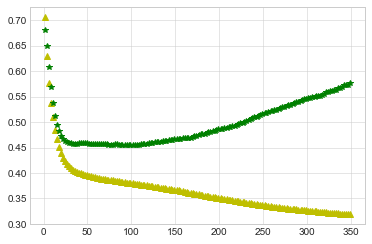

In [42]:
plt.plot(x_collect, train_loss_collect, "y^")
plt.plot(x_collect, valid_loss_collect, "g*")

plt.show()

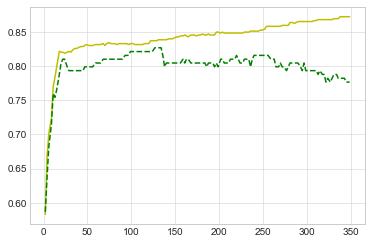

In [43]:
plt.plot(x_collect, train_acc_collect, "y")
plt.plot(x_collect, valid_acc_collect, "g--")
plt.show()

In [44]:
model=build_neural_network()
restorer=tf.train.Saver()
with tf.Session() as sess:
    restorer.restore(sess,"./titanic.ckpt")
    feed={
        model.inputs:test_data,
        model.is_training:False
    }
    test_predict=sess.run(model.predicted,feed_dict=feed)
    
test_predict[:10]

INFO:tensorflow:Restoring parameters from ./titanic.ckpt


array([[ 0.10088264],
       [ 0.09977128],
       [ 0.10082977],
       [ 0.15873887],
       [ 0.31830096],
       [ 0.18308719],
       [ 0.63767177],
       [ 0.00432315],
       [ 0.62714297],
       [ 0.09081731]], dtype=float32)

In [45]:
binarizer=Binarizer(0.5)
test_predict_result=binarizer.fit_transform(test_predict)
test_predict_result=test_predict_result.astype(np.int32)
test_predict_result[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]])

In [46]:
passenger_id=test_passenger_id.copy()
evaluation=passenger_id.to_frame()
evaluation["Survived"]=test_predict_result
evaluation[:10]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [47]:
evaluation.to_csv("evaluation_submission1.csv",index=False)

# Titanic data set  Prediction using RNN model 

In [49]:
feature_sets_train = pd.read_csv('C:\\Users\\susmitha kolli\\Desktop\\train.csv')
feature_sets_test = pd.read_csv('C:\\Users\\susmitha kolli\\Desktop\\test.csv')
feature_sets_train_tests = pd.concat([feature_sets_train, feature_sets_test])
feature_sets = feature_sets_train

In [50]:
passengers = [' '.join(map(str,passenger[[2,3,4,5,8,9,10,11]])) for passenger in feature_sets.values]
passengers_test = [' '.join(map(str,passenger[[1,2,3,4,7,8,9,10]])) for passenger in feature_sets_test.values]

survived = [passenger[1] for passenger in feature_sets.values]
feature_sets = passengers
feature_sets_test = passengers_test
labels =  survived

In [51]:
feature_sets_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [52]:
feature_sets_train_tests

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [53]:
passengers = [' '.join(map(str,passenger[[0,1,2,3,4,5,7,8,9,11]])) for passenger in feature_sets_train_tests.values]

all_text = ' '.join(passengers)
words = all_text.split()

In [54]:
all_text[:1000]

'22.0 nan S 7.25 Braund, Mr. Owen Harris 0 3 male 1 A/5 21171 38.0 C85 C 71.2833 Cumings, Mrs. John Bradley (Florence Briggs Thayer) 0 1 female 1 PC 17599 26.0 nan S 7.925 Heikkinen, Miss. Laina 0 3 female 0 STON/O2. 3101282 35.0 C123 S 53.1 Futrelle, Mrs. Jacques Heath (Lily May Peel) 0 1 female 1 113803 35.0 nan S 8.05 Allen, Mr. William Henry 0 3 male 0 373450 nan nan Q 8.4583 Moran, Mr. James 0 3 male 0 330877 54.0 E46 S 51.8625 McCarthy, Mr. Timothy J 0 1 male 0 17463 2.0 nan S 21.075 Palsson, Master. Gosta Leonard 1 3 male 3 349909 27.0 nan S 11.1333 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) 2 3 female 0 347742 14.0 nan C 30.0708 Nasser, Mrs. Nicholas (Adele Achem) 0 2 female 1 237736 4.0 G6 S 16.7 Sandstrom, Miss. Marguerite Rut 1 3 female 1 PP 9549 58.0 C103 S 26.55 Bonnell, Miss. Elizabeth 0 1 female 0 113783 20.0 nan S 8.05 Saundercock, Mr. William Henry 0 3 male 0 A/5. 2151 39.0 nan S 31.275 Andersson, Mr. Anders Johan 5 3 male 1 347082 14.0 nan S 7.8542 Vestrom, Mis

In [55]:
words[:10]

['22.0', 'nan', 'S', '7.25', 'Braund,', 'Mr.', 'Owen', 'Harris', '0', '3']

In [56]:
from collections import Counter
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

feature_sets_ints = []
feature_sets_ints_test = []
print(feature_sets[0])
for each in feature_sets:
    feature_sets_ints.append([vocab_to_int[word] for word in each.split()])

print(feature_sets_test[0])
for each in feature_sets_test:
    feature_sets_ints_test.append([vocab_to_int[word] for word in each.split()]) 

3 Braund, Mr. Owen Harris male 22.0 A/5 21171 7.25 nan S
3 Kelly, Mr. James male 34.5 330911 7.8292 nan Q


In [57]:
feature_set_lens = Counter([len(x) for x in feature_sets_ints])
print("Zero-length feature_sets: {}".format(feature_set_lens[0]))
print("Maximum feature_set length: {}".format(max(feature_set_lens)))

Zero-length feature_sets: 0
Maximum feature_set length: 22


In [58]:
non_zero_idx = [ii for ii, feature_set in enumerate(feature_sets_ints) if len(feature_set) != 0]
print(len(non_zero_idx))

non_zero_idx_test = [ii for ii, feature_set in enumerate(feature_sets_ints_test) if len(feature_set) != 0]
print(len(non_zero_idx_test))

891
418


In [59]:
print(feature_sets_ints[-1])
print(feature_sets_ints_test[-1])

[7, 2943, 6, 98, 4, 50, 2944, 21, 2, 13]
[7, 455, 19, 284, 88, 4, 2, 456, 454, 2, 10]


In [60]:
feature_sets_ints = [feature_sets_ints[ii] for ii in non_zero_idx]
feature_sets_ints_test = [feature_sets_ints_test[ii] for ii in non_zero_idx_test]

labels = np.array([labels[ii] for ii in non_zero_idx])

In [61]:
seq_len = 24
features = np.zeros((len(feature_sets_ints), seq_len), dtype=int)
for i, row in enumerate(feature_sets_ints):
    features[i, -len(row):] = np.array(row)[:seq_len]
seq_len = 24
features_test = np.zeros((len(feature_sets_ints_test), seq_len), dtype=int)
for i, row in enumerate(feature_sets_ints_test):
    features_test[i, -len(row):] = np.array(row)[:seq_len]

In [62]:
split_frac = 0.75
split_idx = int(len(features)*split_frac)
train_x, val_x = features[:split_idx], features[split_idx:]
train_y, val_y = labels[:split_idx], labels[split_idx:]

test_idx = int(len(val_x)*0.5)
val_x, test_x = val_x[:test_idx], val_x[test_idx:]
val_y, test_y = val_y[:test_idx], val_y[test_idx:]

print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(668, 24) 
Validation set: 	(111, 24) 
Test set: 		(112, 24)


In [63]:
lstm_size = 256
lstm_layers = 1
batch_len = 100
learning_rate = 0.001

In [64]:
n_words = len(vocab_to_int)+1
graph = tf.Graph()
with graph.as_default():
    inputs_ = tf.placeholder(tf.int32, [None, None], name='inputs')
    labels_ = tf.placeholder(tf.int32, [None, None], name='labels')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    batch_size = tf.placeholder_with_default(tf.constant(batch_len), shape=[], name='batch_size')

In [65]:
n_words

3726

In [66]:
embed_size = 300 

with graph.as_default():
    embedding = tf.Variable(tf.random_uniform((n_words, embed_size), -1, 1))
    embed = tf.nn.embedding_lookup(embedding, inputs_)

In [67]:
with graph.as_default():
    lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
    
    drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)
    
    cell = tf.contrib.rnn.MultiRNNCell([drop] * lstm_layers)
    
    initial_state = cell.zero_state(batch_size, tf.float32)

In [68]:
with graph.as_default():
    outputs, final_state = tf.nn.dynamic_rnn(cell, embed,
                                             initial_state=initial_state)

In [69]:
with graph.as_default():
    predictions = tf.contrib.layers.fully_connected(outputs[:, -1], 1, activation_fn=tf.sigmoid)
    cost = tf.losses.mean_squared_error(labels_, predictions)
    
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [70]:
with graph.as_default():
    correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.int32), labels_)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [71]:
def get_batches(x, y, batch_size=100):
    n_batches = len(x)//batch_size
    x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    for ii in range(0, len(x), batch_size):
        yield x[ii:ii+batch_size], y[ii:ii+batch_size]

In [72]:
epochs = 5

with graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    iteration = 1
    for e in range(epochs):
        state = sess.run(initial_state)
        
        for ii, (x, y) in enumerate(get_batches(train_x, train_y, batch_len), 1):
            feed = {inputs_: x,
                    labels_: y[:, None],
                    keep_prob: 0.5,
                    initial_state: state}
            loss, state, _ = sess.run([cost, final_state, optimizer], feed_dict=feed)
            
            if iteration%5==0:
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Train loss: {:.3f}".format(loss))

            if iteration%25==0:
                val_acc = []
                val_state = sess.run(cell.zero_state(batch_len, tf.float32))
                for x, y in get_batches(val_x, val_y, batch_len):
                    feed = {inputs_: x,
                            labels_: y[:, None],
                            keep_prob: 1,
                            initial_state: val_state}
                    batch_acc, val_state = sess.run([accuracy, final_state], feed_dict=feed)
                    val_acc.append(batch_acc)
                print("Val acc: {:.3f}".format(np.mean(val_acc)))
            iteration +=1
    saver.save(sess, "checkpoints/survival_preds.ckpt")

Epoch: 0/5 Iteration: 5 Train loss: 0.217
Epoch: 1/5 Iteration: 10 Train loss: 0.141
Epoch: 2/5 Iteration: 15 Train loss: 0.175
Epoch: 3/5 Iteration: 20 Train loss: 0.129
Epoch: 4/5 Iteration: 25 Train loss: 0.103
Val acc: 0.800
Epoch: 4/5 Iteration: 30 Train loss: 0.101


In [73]:
test_acc = []
with tf.Session(graph=graph) as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    test_state = sess.run(cell.zero_state(batch_len, tf.float32))
    for ii, (x, y) in enumerate(get_batches(test_x, test_y, batch_len), 1):
        feed = {inputs_: x,
                labels_: y[:, None],
                keep_prob: 1,
                initial_state: test_state}
        batch_acc, test_state = sess.run([accuracy, final_state], feed_dict=feed)
        test_acc.append(batch_acc) 
    print("Test accuracy: {:.3f}".format(np.mean(test_acc)))

INFO:tensorflow:Restoring parameters from checkpoints\survival_preds.ckpt
Test accuracy: 0.860


# Titanic data set using  Deep Neural Network (DNN) 

In [75]:
train = pd.read_csv('C:\\Users\\susmitha kolli\\Desktop\\train.csv')
test = pd.read_csv('C:\\Users\\susmitha kolli\\Desktop\\test.csv')

In [76]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
train = train.drop(["Name", "Ticket"], axis=1)
test = test.drop(["Name", "Ticket"], axis=1)

train = train.drop(["Cabin"], axis=1)
test = test.drop(["Cabin"], axis=1)

train.loc[train["Sex"]=="male", "Sex"] = 1
train.loc[train["Sex"]=="female", "Sex"] = 0
test.loc[test["Sex"]=="male", "Sex"] = 1
test.loc[test["Sex"]=="female", "Sex"] = 0

train["Embarked"] = train["Embarked"].fillna("S")

train.loc[train["Embarked"]=="S", "Embarked"] = 0
train.loc[train["Embarked"]=="C", "Embarked"] = 1
train.loc[train["Embarked"]=="Q", "Embarked"] = 2
test.loc[test["Embarked"]=="S", "Embarked"] = 0
test.loc[test["Embarked"]=="C", "Embarked"] = 1
test.loc[test["Embarked"]=="Q", "Embarked"] = 2


test.loc[152, "Fare"] = test.loc[test["Pclass"]==test.Pclass[152], "Fare"].median()

average_age_train   = train["Age"].mean()
std_age_train       = train["Age"].std()
count_nan_age_train = train["Age"].isnull().sum()

average_age_test   = test["Age"].mean()
std_age_test       = test["Age"].std()
count_nan_age_test = test["Age"].isnull().sum()

rand_1 = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train, size = count_nan_age_train)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

train.loc[np.isnan(train["Age"]), "Age"] = rand_1
test.loc[np.isnan(test["Age"]), "Age"] = rand_2

train['Age'] = train['Age'].astype(int)
test['Age']    = test['Age'].astype(int)

In [78]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,0
1,2,1,1,0,38,1,0,71.2833,1
2,3,1,3,0,26,0,0,7.9250,0
3,4,1,1,0,35,1,0,53.1000,0
4,5,0,3,1,35,0,0,8.0500,0


In [79]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.callbacks import Callback

# prepare train & test data
X_train = train.drop(["PassengerId", "Survived"], axis=1)
y_train = train["Survived"]
X_test  = test.drop(["PassengerId"],axis=1)

X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('int32')
y_train = np_utils.to_categorical(y_train, 2)
X_test = np.array(X_test).astype('float32')

Using TensorFlow backend.


In [80]:

model = Sequential()

model.add(Dense(128, input_shape=(7, ), init="uniform"))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])

call = Callback()
print("Training...")
hist = model.fit(X_train, y_train,
                 batch_size=128,
                 nb_epoch=3000,
                 verbose=0,
                 validation_split=0.1,
                 callbacks=[call])

C:\Users\susmitha kolli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, input_shape=(7,), kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\susmitha kolli\Anaconda3\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Training...


In [81]:
# plot loss & accuracy vs epoch number

loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']

from scipy.ndimage.filters import gaussian_filter as gf
fit_loss = gf(loss, sigma=50)
fit_val_loss = gf(val_loss, sigma=50)
fit_acc = gf(acc, sigma=50)
fit_val_acc = gf(val_acc, sigma=50)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 20))
nb_epoch = len(loss)

ax[0].plot(range(nb_epoch), loss, alpha=0.4, color="yellow")
ax[0].plot(range(nb_epoch), val_loss, alpha=0.4, color="green")
ax[0].plot(range(nb_epoch), fit_loss, label='loss', linewidth=4, color="blue")
ax[0].plot(range(nb_epoch), fit_val_loss, label='val_loss', linewidth=4, color="yellow")
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].set_ylim([0.2, 0.6])
ax[0].legend()
ax[0].grid()

ax[1].plot(range(nb_epoch), acc, alpha=0.4, color="yellow")
ax[1].plot(range(nb_epoch), val_acc, alpha=0.4, color="green")
ax[1].plot(range(nb_epoch), fit_acc, label='acc', linewidth=3, color="blue")
ax[1].plot(range(nb_epoch), fit_val_acc, label='val_acc', linewidth=4, color="yellow")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].set_ylim([0.6, 0.95])
ax[1].legend()
ax[1].grid()


In [82]:
fit_acc

array([ 0.7242838 ,  0.72430482,  0.72434689, ...,  0.883497  ,
        0.88349696,  0.88349693])